# Machine Learning Project - Consumer Complaints

## The data

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily. [Learn more](https://www.consumerfinance.gov/data-research/consumer-complaints/)

Source: [https://cfpb.github.io/api/ccdb/index.html](https://cfpb.github.io/api/ccdb/index.html)

The dataset is too large to be pushed to a GitHub repo because of a strict file limit (100MB) which this file exceeds. For that reason the dataset file will be split into multiple files with the following code.

In [5]:
import pandas as pd
rows = pd.read_csv('data/complaints-2020-01-22_08_24.csv', chunksize=50000)

for i, chunk in enumerate(rows):
    chunk.to_csv('data/complaints-2020-01-22_08_24/filepart_{}.csv'.format(i))

The dataset is split up into multiple smaller files each still starting with the heading of the original file. The following code will read and concatenate all files into a pandas dataframe.

In [42]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

csv_files = 'data/complaints-2020-01-22_08_24/*.csv'
dataset = pd.concat([pd.read_csv(f, header=0, delim_whitespace=False) for f in glob.glob(csv_files)], ignore_index = True)
dataset.head()

Unnamed: 0 Date received  \
0           0      07/23/19   
1           1      07/26/19   
2           2      06/03/19   
3           3      07/03/19   
4           4      07/14/19   

                                             Product       Sub-product  \
0  Credit reporting, credit repair services, or o...  Credit reporting   
1                                    Debt collection     I do not know   
2                                    Debt collection     I do not know   
3                                    Debt collection        Other debt   
4  Credit reporting, credit repair services, or o...  Credit reporting   

                                               Issue  \
0  Credit monitoring or identity theft protection...   
1                 False statements or representation   
2                  Attempts to collect debt not owed   
3                  Attempts to collect debt not owed   
4                        Improper use of your report   

                                           Sub-issue  \
0  Problem canceling credit monitoring or identif...   
1                  Attempted to collect wrong amount   
2                                      Debt was paid   
3                  Debt was result of identity theft   
4  Received unsolicited financial product or insu...   

                        Consumer complaint narrative  \
0  I have complained many times that the credit r...   
1  please review the current fraud account and al...   
2  Called multiple times over the years for a deb...   
3  I sent in a letter to the company to have them...   
4  On XX/XX/19 I applied for a Debt Relief Produc...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1  Company believes it acted appropriately as aut...   
2                                               None   
3                                               None   
4                                               None   

                               Company State ZIP code  \
0  Experian Information Solutions Inc.    CA    926XX   
1      Ideal Collection Services, Inc.    FL    333XX   
2     ONEMAIN FINANCIAL HOLDINGS, LLC.    FL    327XX   
3        Diversified Consultants, Inc.    VA    232XX   
4              ClearOne Advantage, LLC    PA    191XX   

                            Tags Consumer consent provided? Submitted via  \
0                           None           Consent provided           Web   
1                           None           Consent provided           Web   
2                           None           Consent provided           Web   
3                           None           Consent provided           Web   
4  Older American, Servicemember           Consent provided           Web   

  Date sent to company Company response to consumer Timely response?  \
0             07/23/19      Closed with explanation              Yes   
1             07/26/19      Closed with explanation              Yes   
2             06/07/19      Closed with explanation              Yes   
3             07/03/19      Closed with explanation              Yes   
4             07/18/19      Closed with explanation              Yes   

  Consumer disputed?  Complaint ID  
0                NaN       3315279  
1                NaN       3319487  
2                NaN       3262794  
3                NaN       3295208  
4                NaN       3306130

### Description

The description of the fields in the dataset:

| Field name | Description | Data type | Notes |
|:---|:---|:---|:---|
| Date received | The date the CFPB received the complaint | date & time |  |
| Product | The type of product the consumer identified in the complaint | plain text | This field is a categorical variable. |
| Sub-product | The type of sub-product the consumer identified in the complaint | plain text | This field is a categorical variable. Not all Products have Sub-products. |
| Issue | The issue the consumer identified in the complaint | plain text | This field is a categorical variable. Possible values are dependent on Product. |
| Sub-issue | The sub-issue the consumer identified in the complaint | plain text | This field is a categorical variable.  Possible values are dependent on product and issue.  Not all Issues have corresponding Sub-issues. |
| Consumer complaint narrative | Consumer complaint narrative is the consumer-submitted description of "what happened" from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer. | plain text | Consumers' descriptions of what happened are included if consumers consent to publishing the description and after we take steps to remove personal information. |
| Company public response | The company's optional, public-facing response to a consumer's complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, "Company believes complaint is the result of an isolated error." | plain text | Companies' public-facing responses to complaints are included if companies choose to publish one. Companies may select a public response from a set list of options as soon as they respond to the complaint, but no later than 180 days after the complaint was sent to the company for response. |
| Company | The complaint is about this company | plain text | This field is a categorical variable. |
| State | The state of the mailing address provided by the consumer | plain text | This field is a categorical variable. |
| ZIP code | The mailing ZIP code provided by the consumer | plain text | Mailing ZIP code provided by the consumer. This field may: i) include the first five digits of a ZIP code; ii) include the first three digits of a ZIP code (if the consumer consented to publication of their complaint narrative); or iii) be blank (if ZIP codes have been submitted with non-numeric values, if there are less than 20,000 people in a given ZIP code, or if the complaint has an address outside of the United States). |
| Tags | Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.  For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged, ‘Older American.’ Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged, ‘Servicemember.’ Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a Veteran or retiree. | plain text |  |
| Consumer consent provided? | Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents and consumers can opt-out at any time. | plain text | This field shows whether a consumer provided consent to publish their complaint narrative, as listed below:<br/><br/>**Consent provided:**<br/>Consumer opted in to share their complaint narrative.<br/><br/>Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first, and after steps have been taken to scrub personal information from the complaint narrative.<br/><br/>**Consent not provided:**<br/>Consumer did not opt-in to publish their complaint narrative. Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first.<br/><br/>**Consent withdrawn:**<br/>Consumer opted in to publish their complaint narrative and later withdrew their consent.<br/><br/>**N/A:** Consumers did not have the option to publish their consumer complaint narrative or the complaint was received before March 19, 2015. Data populates in this field immediately.<br/><br/>**Other:** Complaint does not meet criteria for narrative publication.<br/><br/>Blanks appear until at least 60 days after the complaint is sent to the company for response or until the company provides an optional company public response – whichever comes first. |
| Submitted via | How the complaint was submitted to the CFPB | plain text | This field is a categorical variable. |
| Date sent to company | The date the CFPB sent the complaint to the company | date & time |  |
| Company response to consumer | This is how the company responded. For example, "Closed with explanation." | plain text | This field is a categorical variable. |
| Timely response? | Whether the company gave a timely response | plain text | yes/no |
| Consumer disputed? | Whether the consumer disputed the company’s response | plain text | **Yes**<br/>**No**<br/>**N/A:** The Bureau discontinued the consumer dispute option on April 24, 2017. |
| Complaint ID | The unique identification number for a complaint | number |  |

## Exploratory Data Analysis (EDA)

The dataset consists of complaints which have been labeled by a couple of columns. The columns that can be considered labels are the following; Product, Sub-product, Issue, Sub-Issue and Tags. The table below displays the different products with the number of complaints that have been registered for that product. Certain products have more complaints than others. When only considering the product column in terms of data cleanliness one can see that some products overlap. An example of this are the products "Credit card or prepaid card", "Credit card", "Prepaid card". This should be taken into consideration when doing further analysis.

In [126]:
dataset['Product'].value_counts().to_frame()

,Product
"Credit reporting, credit repair services, or other personal consumer reports",141742
Debt collection,105765
Mortgage,61094
Credit reporting,31588
Credit card or prepaid card,31482
Student loan,24930
Credit card,18838
Checking or savings account,18784
Bank account or service,14885
Consumer Loan,9473


The following bar plot shows the distribution of products.

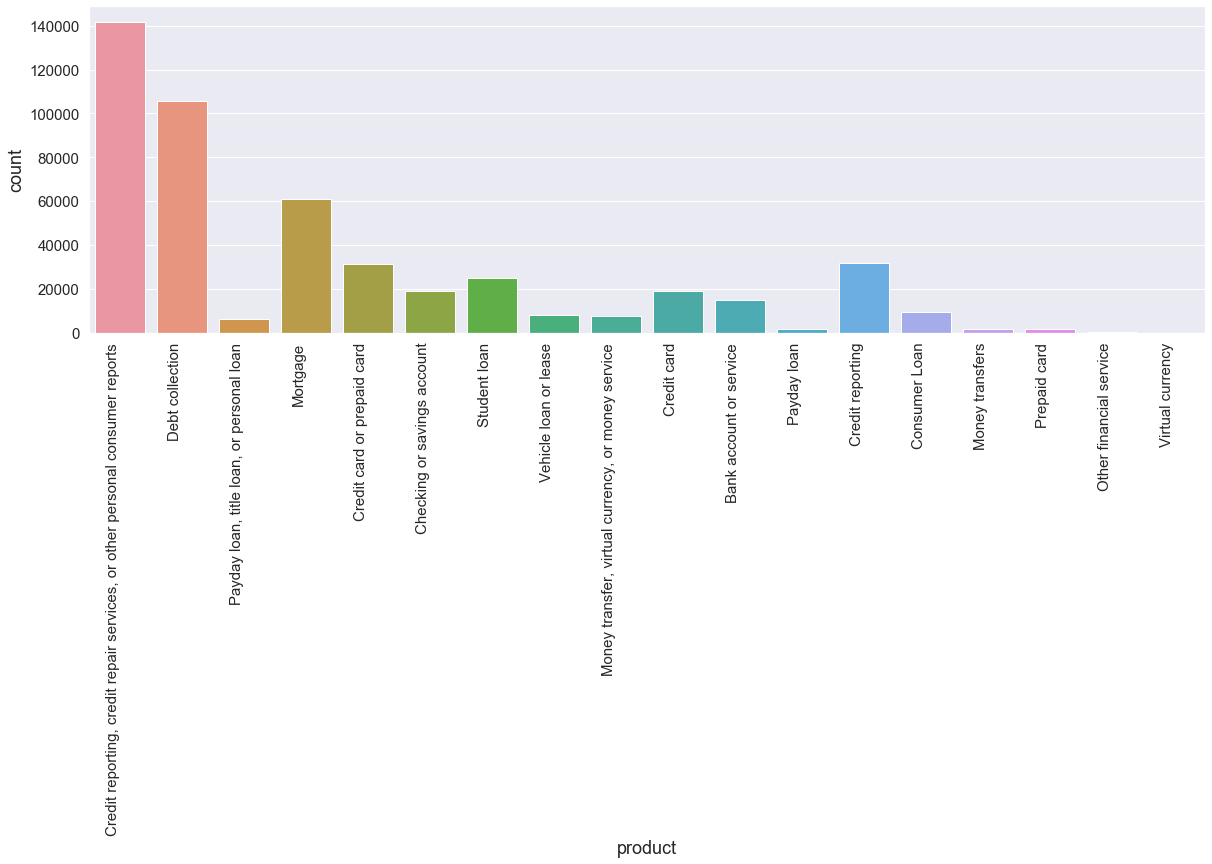

In [127]:
plt.figure(figsize=(20,6))
chart = sns.countplot(x='Product', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.tick_params(labelsize=15)
plt.xlabel('product', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.show()

As seen above, the dataset is not balanced. This means that in the worst case, the less frequent classes are treated as outliers and would be ignored. We can solve this by **undersampling or oversampling** each class.
However, this is not always in our best interest to solve the imbalance this way. Sometimes it is desirable to have a classifier that gives high prediction accuracy over the majority classes while maintaining reasonable accuracy for the minority classes.
For this reason, the dataset will not be undersampled or oversampled and will be left as is. We will solve this problem by stratifying the classes when splitting the data. This means that both the training and test sets will have the same distribution.

As a hypothesis, we can say that products that have a higher occurrence will probably have a more accurate prediction when testing.

The following table consists of the number of complaints per product and their sub-products. A fact about these labels is that sub-products aren't unique for products.

In [128]:
product_cat = dataset.groupby(['Product','Sub-product']).size().to_frame()
pd.set_option('display.max_rows', len(product_cat))
product_cat

0
Product                                            Sub-product                                       
Bank account or service                            (CD) Certificate of deposit                    274
                                                   Cashing a check without an account             134
                                                   Checking account                             10113
                                                   Other bank product/service                    3477
                                                   Savings account                                887
Checking or savings account                        CD (Certificate of Deposit)                    338
                                                   Checking account                             15632
                                                   Other banking product or service              1483
                                                   Personal line of credit                         14
                                                   Savings account                               1317
Consumer Loan                                      Installment loan                              3093
                                                   Pawn loan                                       34
                                                   Personal line of credit                         44
                                                   Title loan                                     199
                                                   Vehicle lease                                  962
                                                   Vehicle loan                                  5141
Credit card                                        None                                         18838
Credit card or prepaid card                        General-purpose credit card or charge card   23961
                                                   General-purpose prepaid card                  1270
                                                   Gift card                                      144
                                                   Government benefit card                        335
                                                   Payroll card                                   131
                                                   Store credit card                             5638
                                                   Student prepaid card                             3
Credit reporting                                   None                                         31588
Credit reporting, credit repair services, or ot... Conventional home mortgage                       1
                                                   Credit repair services                         726
                                                   Credit reporting                            138534
                                                   Other personal consumer report                2481
Debt collection                                    Auto                                          1064
                                                   Auto debt                                     2319
                                                   Credit card                                   7520
                                                   Credit card debt                             14522
                                                   Federal student loan                           549
                                                   Federal student loan debt                     1126
                                                   I do not know                                20639
                                                   Medical                                       6990
                                                   Medical debt                                 11239
                    

Next to product and sub-product as labels, there are also these columns for issues and sub-issues. The two tables below show that a lot of issues exist and that a lot of the sub-issues are labeled "None". The issues are also imbalanced in the same way as with the products explained above.

In [6]:
pd.set_option('display.max_rows', len(dataset))
dataset['Issue'].value_counts().to_frame()

,Issue
Incorrect information on your report,77776
Problem with a credit reporting company's investigation into an existing problem,38424
Attempts to collect debt not owed,28629
Incorrect information on credit report,21217
Improper use of your report,20239
Cont'd attempts collect debt not owed,17434
"Loan servicing, payments, escrow account",14722
Communication tactics,13711
Trouble during payment process,13280
Written notification about debt,12365


The following table consists of the number of complaints per issues and their sub-issues. A fact about these labels is that sub-issues aren't unique for issues. A lot of the sub-issues are catgorized as none, so this makes predicting these labels a lot more complex and irrelevant.

In [7]:
issue_cat = dataset.groupby(['Issue','Sub-issue']).size().to_frame()
pd.set_option('display.max_rows', len(issue_cat))
issue_cat

0
Issue                                              Sub-issue                                                
APR or interest rate                               None                                                  785
Account opening, closing, or management            None                                                 6347
Account terms and changes                          None                                                   17
Adding money                                       None                                                   92
Advertising                                        Changes in terms from what was offered or adver...     18
                                                   Confusing or misleading advertising about the card     59
Advertising and marketing                          None                                                  830
Advertising and marketing, including promotiona... Confusing or misleading advertising about the c...    947
                                                   Didn't receive advertised or promotional terms       1452
Advertising, marketing or disclosures              None                                                   25
Application processing delay                       None                                                  107
Application, originator, mortgage broker           None                                                 3746
Applied for loan/did not receive money             None                                                   85
Applying for a mortgage                            None                                                  190
Applying for a mortgage or refinancing an exist... None                                                 3004
Arbitration                                        None                                                   83
Attempts to collect debt not owed                  Debt is not yours                                   14708
                                                   Debt was already discharged in bankruptcy and i...   1491
                                                   Debt was paid                                        6413
                                                   Debt was result of identity theft                    6017
Balance transfer                                   None                                                  298
Balance transfer fee                               None                                                   51
Bankruptcy                                         None                                                   96
Billing disputes                                   None                                                 3102
Billing statement                                  None                                                  620
Can't contact lender                               None                                                  372
Can't contact lender or servicer                   None                                                  172
Can't repay my loan                                Can't decrease my monthly payments                   1557
                                                   Can't get flexible payment options                    999
                                                   Can't temporarily postpone payments                   501
Can't stop charges to bank account                 None                                                  166
Can't stop withdrawals from your bank account      None                                                  148
Cash advance                                       None                                                   44
Cash advance fee                                   None                                                   41
Charged bank acct wrong day or amt                 None                                                  106
Charged fees or interest I didn't expect           None                   

The column "Tag" could be considered as a label. The table below shows all unique values for this column and it appears that there are only 4. For this reason, it is not a good feature to use for a model for predictions.

In [8]:
pd.set_option('display.max_rows', len(dataset))
dataset['Tags'].value_counts().to_frame()

,Tags
None,402436
Servicemember,49801
Older American,26802
"Older American, Servicemember",6662


The heatmap below shows the correlation between all columns. To be able to generate a correlation heatmap, we first have to factorize all columns so that categorical data is numerical. When looking at the heatmap we can conclude that not all columns have correlations and not all will be of any meaning for classification. Some of the columns aren't meant to be factorized to be put in a correlation matrix, but it's easier to use this one factorize lambda function on the whole dataset and then only look at what has a logical meaning in the matrix.

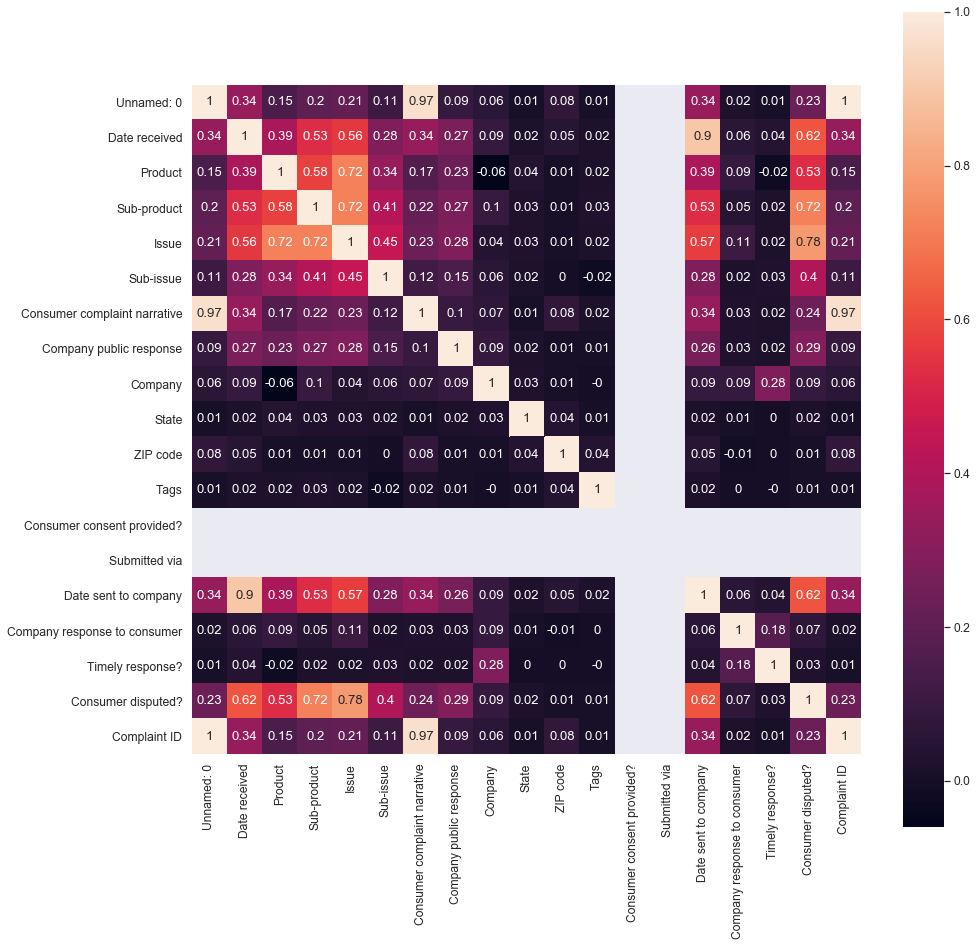

In [129]:
factorized_dataset = dataset.apply(lambda x: pd.factorize(x)[0])

corr = factorized_dataset.corr().round(2)

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, annot=True, square=True)

Columns that contain data that is not relevant to the question have been removed from the dataset. These columns also had no correlation as the heatmap above showcases or had no meaning for our purpose.

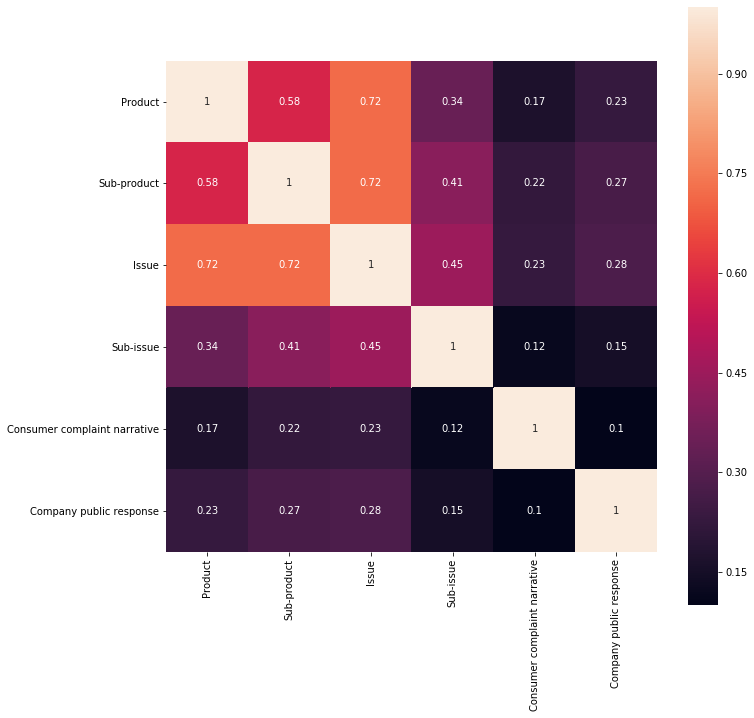

In [43]:
cleaned_dataset = dataset.drop(['Unnamed: 0', 'Date received', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Timely response?', 'Date sent to company', 'Consumer disputed?', 'Complaint ID'], axis=1)

factorized_cleaned_dataset = cleaned_dataset.apply(lambda x: pd.factorize(x)[0])

corr = factorized_cleaned_dataset.corr().round(2)

f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data=corr, annot=True, square=True)

The following code encodes the 4 labels (Product, Sub-product, Issue en Sub-issue) to one-hot-encoding, these encoded values are saved in new columns. The unique label values for all columns are also stored in ids and a mapping from id to label and vice versa is stored in two dictionaries. This will be of good use in further code samples.

In [44]:
cleaned_dataset = cleaned_dataset[pd.notnull(dataset['Consumer complaint narrative'])]

cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue']
ids = []
label_to_id = []
id_to_label = []

count = 0
for c in cols:
    one_hot_encoding = pd.get_dummies(cleaned_dataset[c], prefix = c)
    cleaned_dataset = pd.concat([cleaned_dataset, one_hot_encoding], axis = 1)
    
    cleaned_dataset[c + ' id'] = cleaned_dataset[c].factorize()[0]
    ids.append(cleaned_dataset[[c, c + ' id']].drop_duplicates().sort_values(c + ' id'))
    label_to_id.append(dict(ids[count].values))
    id_to_label.append(dict(ids[count][[c + ' id', c]].values))
    count += 1

cleaned_dataset.head(5)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Product_Bank account or service,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,...,Sub-issue_Unable to open an account,Sub-issue_Unable to receive car title or other problem after the loan is paid off,Sub-issue_Unexpected increase in interest rate,"Sub-issue_Used obscene, profane, or other abusive language",Sub-issue_Used obscene/profane/abusive language,Sub-issue_Was not notified of investigation status or results,"Sub-issue_Was signed up for overdraft on card, but don't want to be",Sub-issue_You never received your bill or did not know a payment was due,"Sub-issue_You told them to stop contacting you, but they keep trying",Sub-issue id
0,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Some of the fields, like names, dates and other details, in the consumer complaint narratives have been replaced with x-characters and curly braces. This needs to be removed because it could have an impact on the model. Dates, more than two consecutive x-characters and curly braces have been removed.

In [52]:
import re

cleaned_dataset['Consumer complaint narrative'] = cleaned_dataset['Consumer complaint narrative'].replace(to_replace='XX/XX/\d\d|xx+|XX+|{|}', value='', regex=True)
cleaned_dataset['Consumer complaint narrative'] = cleaned_dataset['Consumer complaint narrative'].str.lower()

In [71]:
show_n_rows = 50

pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = show_n_rows

cleaned_dataset['Consumer complaint narrative'].head(show_n_rows)

0     i have complained many times that the credit reporting by experian is inaccurate and they always just say wait awhile, it will be fixed later and yet it never is. they are incapable of providing accurate information and do not take responsibility for their errors. this is a fake service, designed to serve only their needs and not the consumer 's needs. i can not find any way to cancel and when i mention it on the phone i am immediately disconnected. \r\ni want to be a part of the class action lawsuit against them since they are responsible for reducing my credit rating, releasing my personal information and my fraud complaints have multiplied over the last 2-3 years. i have spoken to many ineffectual and uncaring agents on their phone support lines and am just tired of paying them to degrade my credit for random incorrect reasons ( like i paid a utility bill with another bank account ) and not raising it for legitimate things like paying off thousands of dollars of debt, getting 

## Research and analysis of different possible modus operandi

### Exploratory Data Analysis (EDA)

#### Definition

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Source: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

#### Techniques and tools

There are a number of tools that are useful for EDA, but EDA is characterized more by the attitude taken than by particular techniques.

Interesting techniques and tools for the project are:

- Histograms
- Bivariate and Univariate Distribution Plots
- Correlation Matrix
- Targeted Projection Pursuit (TPP)
- Principal Component Analysis (PCA)
- Nonlinear Dimensionality Reduction (NLDR)

By using these techniques and tools it is possible to do two things:
1. Visualize hypothesis and confirm/reject them
2. Visualize the data to find patterns

### Supervised Machine Learning

#### Definition

Supervised learning is the machine learning task of training a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

Supervised learning is where you have input variables (x) and an output variable (y). You use an algorithm to learn the mapping function from the input to the output.

    y = f(x)

The goal is to approximate the mapping function so well that when you have a new input data (x), that you can predict the output variables (y) for that data.

Supervised learning problems can be grouped into 2 fields:
1. Classification
2. Regression

In this scenerio we will go deeper in the technology of Classification, where the output of a variable is a category (labeled).

#### Naive Bayes Classifier

This is a simple classification method based on the Bayes rule. It relies on a very simple representation of the document, called the bag of words representation.

__Advantages__:
1. Easy to implement
2. Fast
3. If the independece assumption holds then it works more efficiently than other algorithms
4. It requires less training data
5. It is highly scalable
6. It can make probabilistic predictions
7. Can handle both continuous and discrete data
8. Insensitive towards irrelevant features
9. It can work easily with missing values
10. Easy to update on arrival of new data
11. Best suited for text classification problems

__Disadvantages__:
1. The strong assumtion about the features to be independent which is hardly true in real life applications
2. Data scarcity
3. Chances of loss of accuracy
4. Zero Frequency Problem (not in training data, model doesn't recognizes it)

#### Support Vector Machines (SVM)

Commonly used for classification and regression challenges. In the Support Vector Machines (SVM) algorithm, each point is represented as a data item within the n-dimensional space where the value of each feature is the value of a specific coordinate. After plotting, classification has been performed by finding a hyperplane which differentiates two classes.

__Advantages__:
1. Even if input data are non-linear and non-separable, SVMs generate accurate classification results because of its robustness
2. In the decision function, it uses a subset of training points called support vectors hence it's memory efficient
3. It is useful to solve any complex problem with a suitable kernel function (function that transforms data into a suitable form)
4. Less risk of overfitting because of generalized SVM Models
5. SVMs work great for text classification and when finding the best linear seperator

__Disadvantages__:
1. It takes a long training time when working with large datasets
2. It is hard to understand the final model and individual impact

#### Learning Vector Quantization (LVQ)

Learning Vector Quantization (LVQ) is a prototype-based learning method. One or more prototypes are used to represent each class in the dataset, each prototype is described as a point in the feature space. New (unknown) datapoints are then assigned the class of the prototype nearest to them.

__Advantages__:
1. Simple and intuitive
2. Easy to implement while still yielding decent performance
3. Unlimited amount of prototypes per class
4. Distance measure is of choice

__Disavantages__:
1. Euclidean distance can cause problems if the data has a lot of dimensions or is noisy
2. Proper normalization and pre-processing of the feature space is necessary. But still then, dimensionality reduction is prefered.

#### K-Nearest Neighbor (KNN)


K Nearest Neighbours is a basic algorithm that stores all the available and predicts the classification of unlabelled data based on a similarity measure. The algorithm works on the assumption that similar things exist in close proximity for example in the Cartesian system.

__Advantages__:
1. One of the simplest and easiest algorithms used for classification

__Disadvantages__:
1. It doesn't work well with categorical data
2. It doesn't work well with highly dimensional data

#### Random Forest

This is an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time. The output is the class that is the mode of the classes (classification) or mean predicition (regression) of the individual trees. It is based on the concept of 'bagging', bootstrap aggregating.

__Advantages__:
1. Less chance of overfitting the training set
2. Can solve both types of problems (classification and regression) and does a decent estimation at both fronts
3. It works great with large data sets with higher dimensionality
4. It has an effective method for estimating missing data and maintains accuracy when large proportions of the data are missing

__Disadvantages__:
1. Works better for classification than regression
2. Random forest can feel like a black box approach

### Sources

- http://en.wikipedia.org/

- https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16

- https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

- https://www.educba.com/

- https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm

## Supervised Learning Implementation

For supervised machine learning, we have decided to implement Naive Bayes Classifier, Support Vector Machines and Random Forest because of the advantage described above. We won't implement K-Nearest Neighbor because it doesn't work well with categorical data and we also won't implement Learning Vector Quantization because of the difficulty level.

We will be focussing on predicting products because products are very specific labels and to us, it seems useful to be able to predict the product to which a complaint belongs so that the correct people can handle a complaint based on the predicted product. The issue would also be a good label to predict but there is a bigger chance that new issue labels will exist in the future while product labels will probably not change that fast.

### Naive Bayes Classifier

In [72]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gilli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gilli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The following code sample is useful to have an idea of the top 2 correlated uni- and bigrams for each product. To find the correlated words we use vectorization in combination with a function called chi2. This function uses the vectorized features to determine correlations between words and labels (here products).

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf.fit_transform(dataset['Consumer complaint narrative'])
labels = cleaned_dataset['Product id']

N = 2
for label, label_id in sorted(label_to_id[0].items()):
    features_chi2 = chi2(features, labels == label_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("'{}':".format(label))
    print("\tMost correlated unigrams: {}".format(', '.join(unigrams[-N:])))
    print("\tMost correlated bigrams: {}\n".format(', '.join(bigrams[-N:])))

'Bank account or service':
	Most correlated unigrams: bank, overdraft
	Most correlated bigrams: overdraft fees, checking account

'Checking or savings account':
	Most correlated unigrams: overdraft, deposit
	Most correlated bigrams: savings account, checking account

'Consumer Loan':
	Most correlated unigrams: car, vehicle
	Most correlated bigrams: chrysler capital, auto loan

'Credit card':
	Most correlated unigrams: macy, card
	Most correlated bigrams: american express, credit card

'Credit card or prepaid card':
	Most correlated unigrams: express, card
	Most correlated bigrams: american express, credit card

'Credit reporting':
	Most correlated unigrams: equifax, experian
	Most correlated bigrams: disputed please, manner soon

'Credit reporting, credit repair services, or other personal consumer reports':
	Most correlated unigrams: report, equifax
	Most correlated bigrams: identity theft, credit report

'Debt collection':
	Most correlated unigrams: collection, debt
	Most correlated 

Remove the factorized columns because we will use the columns with the one-hot-encoding to train models. This because factorized values can have a bad effect on classification. One-hot-encoding doesn't have this issue.

In [74]:
cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue']

for c in cols:
    del cleaned_dataset[c + ' id']

The next step is to find good hyperparameter values for the chosen classification techniques. This is accomplished by using gridsearchcv to compute all combinations of the listed parameters and test which have the best result in terms of accuracy. The params that are tested are listed in a parameter grid. We also use pipelines, this enables us to easily transform data in a manner which uses the output of the previous transformation as the input of the next transformation. Gridsearch also does crossvalidation, we have chosen to use a 5-fold cross validation strategy to check the hyperparameters and accuracy.

The output shows the accuracy meassures and the best parameter values from the grid.

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(encoding='latin-1', stop_words=stop_words)),
    ('mnb_clf', OneVsRestClassifier(MultinomialNB(class_prior=None))),
])

parameters  = {
    'tfidf__sublinear_tf': [True, False],
    'tfidf__norm': ('l1', 'l2', None),
    'tfidf__min_df': [1, 5, 10, 25, 50],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'mnb_clf__estimator__fit_prior':  [True, False],
    'mnb_clf__estimator__alpha': (1, 0.1, 0.01, 0.001)
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 74

{'mnb_clf__estimator__alpha': 0.01, 'mnb_clf__estimator__fit_prior': False, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': False}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.5758    0.3355    0.4240      4912
                                                 Checking or savings account     0.5392    0.7548    0.6290      6199
                                                               Consumer Loan     0.5132    0.2367    0.3240      3126
                                                                 Credit card     0.5437    0.2710    0.3617      6217
                                                 Credit card or prepaid card     0.5316    0.7713    0.6294     10389
                                                            Credit reporting     0.7493    0.4061    0.5267     10

The next code sample trains the model with the best hyperparameter values from the result above.

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1, 2), norm='l2', sublinear_tf=False, encoding='latin-1', stop_words=stop_words)),
    ('mnb_clf', OneVsRestClassifier(MultinomialNB(alpha=0.01, fit_prior=False, class_prior=None))),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7527919541807564


We can test the model by using text input and by letting it predict a label (product) for the input.

In [76]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


The confusion matrix displays the accuracy when using the test set. We can conclude that this model has an average to good accuracy. Certain products are not predicted correctly, this is mainly the case for the products "Money transfer" and virtual currency. The main reason for this is that certain complaints can be labeled with multiple labels and this makes it more difficult to predict a correct label. A complaint could, for example, be about buying bitcoins with a credit card, we humans would label this as "Virtual currency" but this model doesn't. It will rather label that with some product about credit cards.

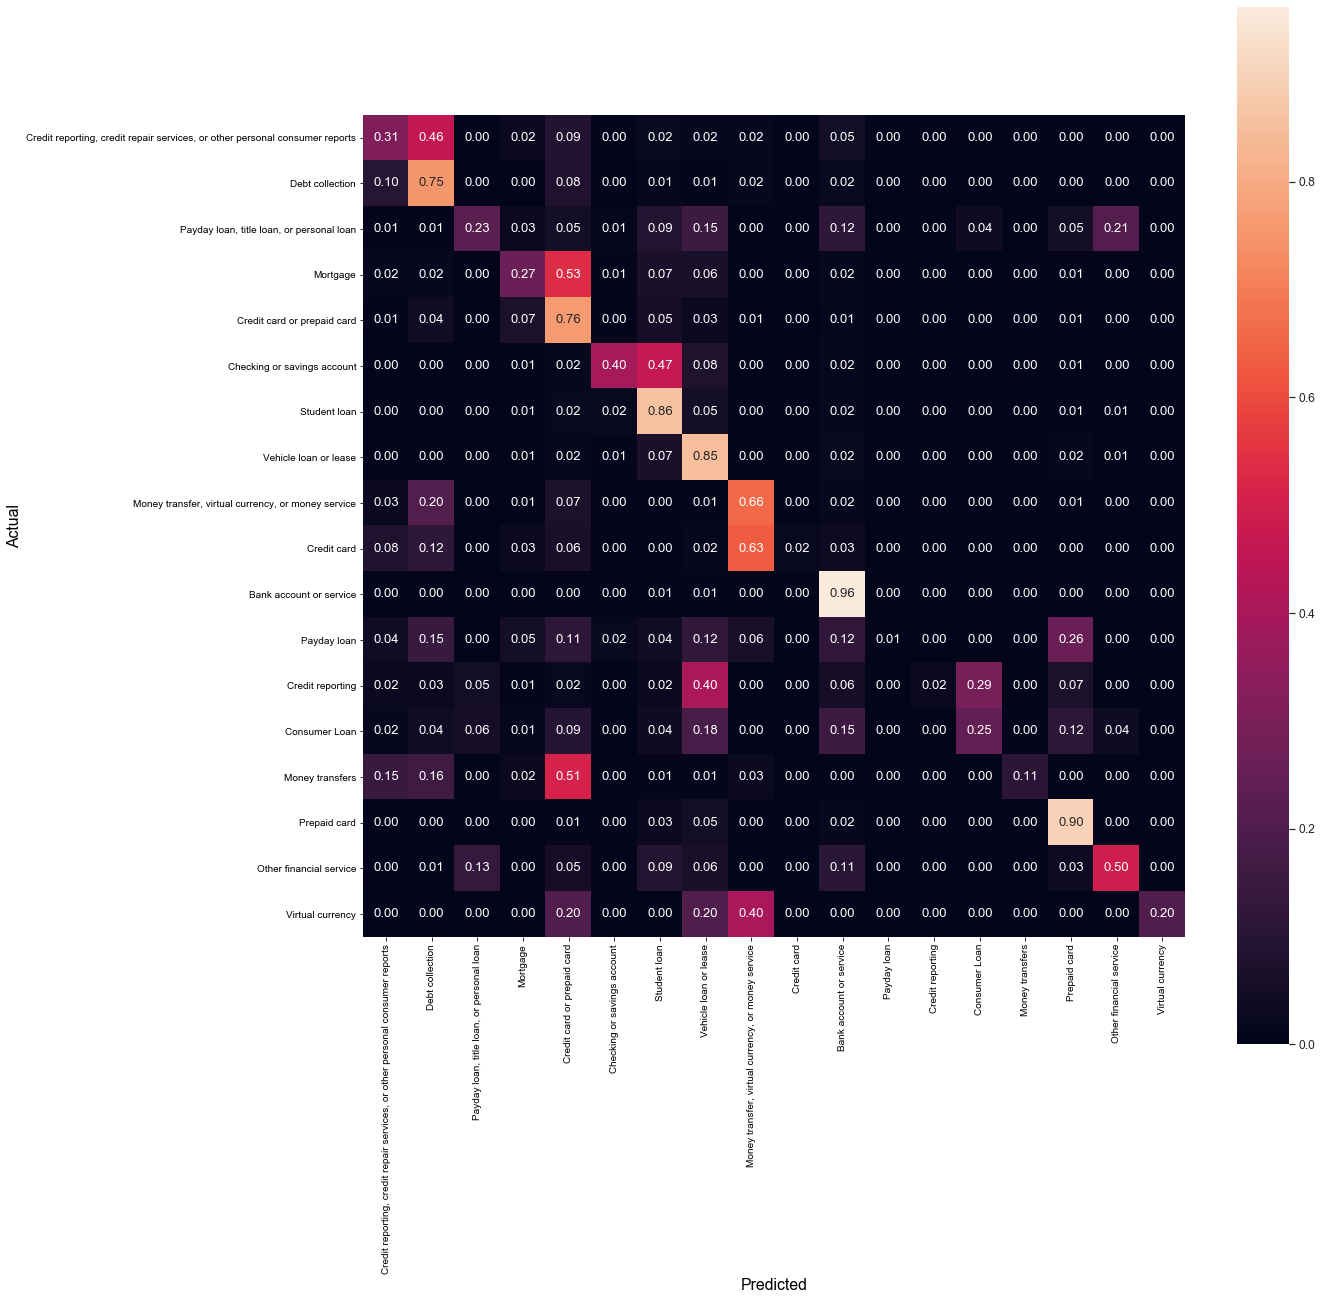

In [77]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

### Support Vector Machines (SVM)

This type of classifier will be implemented in the same way. The first step again is to find the best hyperparameter values.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('vectorize', CountVectorizer(ngram_range=(1,2), stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('svc_clf', LinearSVC(multi_class='ovr')),
])

parameters  = {
    'vectorize__min_df': [0.01, 0.05, 0.1],
    'vectorize__max_df': [0.4, 0.6, 0.8],
    'tfidf__norm': ('l1', 'l2'),
    'tfidf__use_idf': [True, False],
    'tfidf__sublinear_tf': [True, False],
    'svc_clf__loss': ('hinge', 'squared_hinge'),
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 105.3min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 124.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 149.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 172.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 194.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 214.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elap

{'svc_clf__loss': 'squared_hinge', 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True, 'tfidf__use_idf': False, 'vectorize__max_df': 0.6, 'vectorize__min_df': 0.01}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.6032    0.4748    0.5313      4912
                                                 Checking or savings account     0.6361    0.6803    0.6575      6199
                                                               Consumer Loan     0.5294    0.2220    0.3128      3126
                                                                 Credit card     0.5894    0.3589    0.4461      6217
                                                 Credit card or prepaid card     0.6082    0.6808    0.6424     10389
                                                            Credit reporting     0.6546    0.2278    0.3380     10424
Credit rep

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('vectorize', CountVectorizer(min_df=0.01, max_df=0.6, ngram_range=(1,2), stop_words=stop_words)),
    ('tfidf', TfidfTransformer(norm='l2', sublinear_tf=True, use_idf=False)),
    ('svc_clf', LinearSVC(multi_class='ovr', loss='squared_hinge')),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7183651314558092


In [79]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


The confusion matrix shows that the model has an average to good accuracy. We can draw the same conclusion as for the Naive Bayes Classifier. The model has good accuracy but certain products have a bad prediction rate because of the same reason as described above.

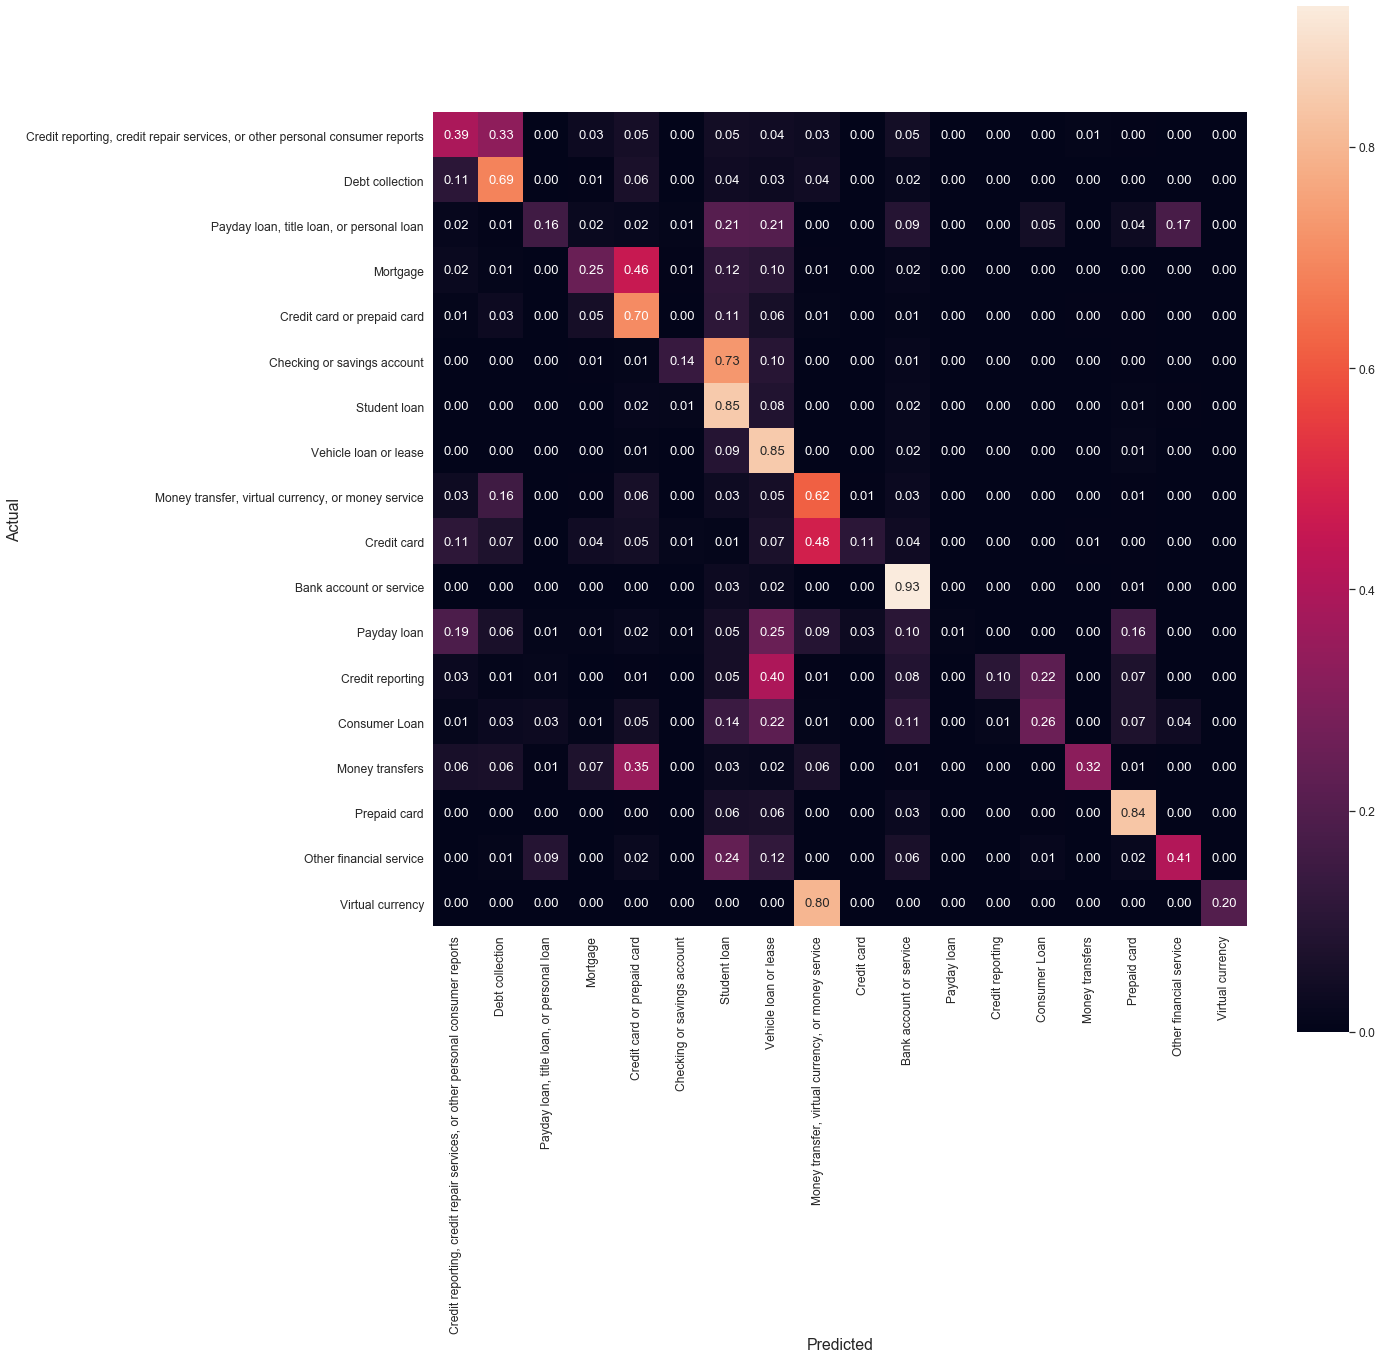

In [80]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

### Random Forest Classification

The last implementation of a supervised classifier is the Random Forest Classifier. We use the same steps as before to get a classifier with good hyperparameter values.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(encoding='latin-1', stop_words=stop_words)),
    ('rfc_clf', RandomForestClassifier()),
])

parameters  = {
    'tfidf__norm': ['l2'],
    'tfidf__ngram_range': [(1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_df': [0.01, 0.05, 0.1],
    'tfidf__max_df': [0.6, 0.7, 0.8],
    'rfc_clf__max_depth': [200, 700, 1400, None],
    'rfc_clf__n_estimators': [10, 20, 40, 120],
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 99.8min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 120.1min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 148.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 167.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 192.2min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed: 247.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 286.9min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elap

{'rfc_clf__max_depth': 700, 'rfc_clf__n_estimators': 120, 'tfidf__max_df': 0.8, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.5546    0.4662    0.5066      4912
                                                 Checking or savings account     0.5768    0.6109    0.5933      6199
                                                               Consumer Loan     0.5291    0.1571    0.2422      3126
                                                                 Credit card     0.5747    0.3101    0.4028      6217
                                                 Credit card or prepaid card     0.5893    0.6513    0.6187     10389
                                                            Credit reporting     0.8809    0.2561    0.3969 

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8, sublinear_tf=True, ngram_range=(1, 2), norm='l2', encoding='latin-1', stop_words=stop_words)),
    ('rfc_clf', RandomForestClassifier(n_jobs=-1, max_depth=700, n_estimators=120)),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7353040266530241


In [82]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


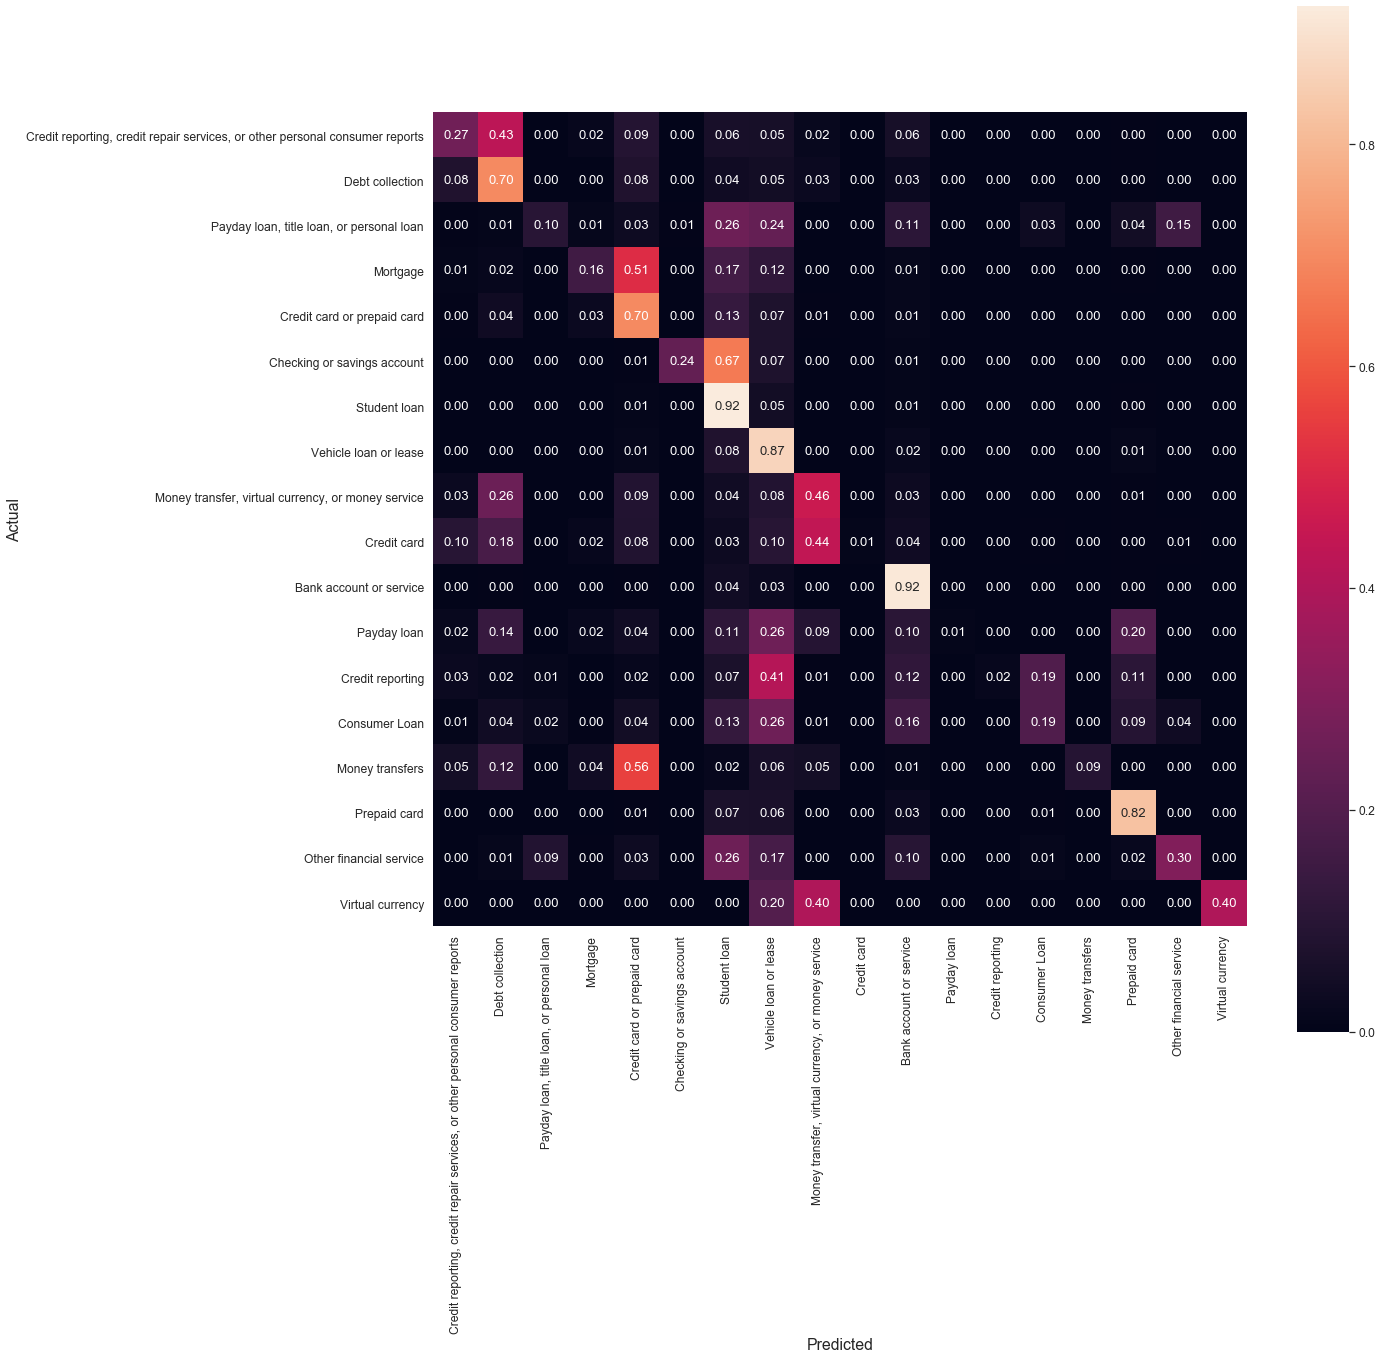

In [83]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

## Member workload

| Name | Subject | Date |
| :--- | :--- | :--- |
| Gillis Werrebrouck | Initial project setup including setting up the initial notebook, splitting up the dataset and reading all part files into one pandas dataframe. | March 1, 2020 |
| All | Video call to discuss the approach and divison of tasks. | March 12, 2020 |
| Gillis Werrebrouck | Exploratory data analysis. | March 12, 2020 |
| Robin De Zwaef | Started with data cleaning, reading up on best practices to clean textual data. | March 14, 2020 |
| Christophe Beke | Started with the analysis and research: EDA, Supervised, Unsupervised. | March 16, 2020 |
| Gillis Werrebrouck | Revision and cleaning up current state of the notebook. | March 17, 2020 |
| All | Video call to discuss the classifiers that will be implemented. | March 19, 2020 |
| Gillis Werrebrouck | Data cleaning | March 19, 2020 |
| Christophe Beke | Pre-processing + indexing + implementation Random Forest. | March 20, 2020 |
| Christophe Beke | Hyperparametertuning + conclusions Random Forest. | March 18, 2020 |
| Robin De Zwaef | Started implementing SVM & data cleaning. | March 21, 2020 |
| Robin De Zwaef | Finished implementing SVM & data cleaning. | March 22, 2020 |
| All | Video call to discuss the implemented classifiers and formulate conclusions. | March 24, 2020 |
| Gillis Werrebrouck | Merge all supervised classifiers into one notebook and revision and cleaning up. | March 25, 2020 |
| Gillis Werrebrouck | Revision sprint 1 - data cleanup (remove certain things from narative) + use one-hot-encoding instead of factorization). | April 7, 2020 |